# TASK-8

## Stock-Market-Prediction-using-Numerical-and-Textual-Analysis

### Author- Sunny Kumar Tripathi

## Step 1: Importing necessary Python Package

In [15]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#NLP libraries
import nltk
import re
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob

## Step 2: Importing dataset

In [2]:
# Importing here dataset from url
df = pd.read_csv('india-news-headlines 1.csv' )
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
df.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [3]:
#Data with null values
print(df.isnull().sum())

# no null values 

publish_date         0
headline_category    0
headline_text        0
dtype: int64


In [4]:
# data shape and size and other information
print('Shape of Data is:',df.shape)
print('Size of Data is:',df.size)
print('Dimension of Data is:',df.ndim)
print('Various Insights of Data:\n')
df.info()

Shape of Data is: (33206, 3)
Size of Data is: 99618
Dimension of Data is: 2
Various Insights of Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33206 entries, 0 to 33205
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   publish_date       33206 non-null  int64 
 1   headline_category  33206 non-null  object
 2   headline_text      33206 non-null  object
dtypes: int64(1), object(2)
memory usage: 778.4+ KB


In [5]:
#Data Columns
print('Columns in Data ----',df.columns)

Columns in Data ---- Index(['publish_date', 'headline_category', 'headline_text'], dtype='object')


In [7]:
df['headline_text'][0:5]

0    win over cena satisfying but defeating underta...
1    Status quo will not be disturbed at Ayodhya; s...
2                  Fissures in Hurriyat over Pak visit
3                America's unwanted heading for India?
4                   For bigwigs; it is destination Goa
Name: headline_text, dtype: object

In [8]:
 #Converting data type of Date column 
df['Date'] = pd.to_datetime(df['publish_date'],format= '%Y%m%d')
df['Date'][0:5]

0   2001-01-01
1   2001-01-02
2   2001-01-02
3   2001-01-02
4   2001-01-02
Name: Date, dtype: datetime64[ns]

In [ ]:
# Removing punctuations train data
df['headline_text'].replace("[^a-zA-Z]"," ",regex=True, inplace=True)
df['headline_text'].head()

In [ ]:
df['headline_text']=df['headline_text'].str.lower()
df['headline_text'][0:5]

In [9]:
ps=PorterStemmer()
#Cleaning headlines
c = []
for i in range(0,len(df['headline_text'])):
    news = re.sub('[^a-zA-Z]',' ',df['headline_text'][i])
    news = news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in set(stopwords.words('english'))]
    news=' '.join(news)
    c.append(news)

In [10]:
df['headline_text'] = pd.Series(c)
df['headline_text']

0        win cena satisfi defeat undertak bigger roman ...
1                    statu quo disturb ayodhya say vajpaye
2                                fissur hurriyat pak visit
3                                america unwant head india
4                                        bigwig destin goa
5                         extra buse clear tourist traffic
6                         dilut power transfer say riberio
7                                   focu shift teach hindi
8                                  becom compulsori school
9                   move stop freedom fighter pension flay
10                    gilani claim appli passport year ago
11                                 parivar dismiss pm warn
12                          india pak exchang list n plant
13                         qureshi return realli help govt
14                      pm tacit messag put ram tampl hold
15                                text prime minist articl
16                                  ncw focu violenc wom

In [16]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [18]:
#Adding subjectivity and polarity columns
df['Subjectivity'] = df['headline_text'].apply(getSubjectivity)
df['Polarity'] = df['headline_text'].apply(getPolarity)
df.head()

,publish_date,headline_category,headline_text,Date,Subjectivity,Polarity
0,20010101,sports.wwe,win cena satisfi defeat undertak bigger roman ...,2001-01-01,0.45,0.4
1,20010102,unknown,statu quo disturb ayodhya say vajpaye,2001-01-02,0.00,0.0
2,20010102,unknown,fissur hurriyat pak visit,2001-01-02,0.00,0.0
3,20010102,unknown,america unwant head india,2001-01-02,0.00,0.0
4,20010102,unknown,bigwig destin goa,2001-01-02,0.00,0.0


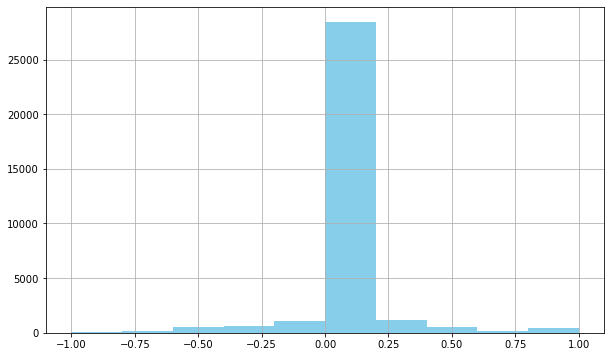

In [22]:
plt.figure(figsize = (10,6))
df['Polarity'].hist(color = 'skyblue')

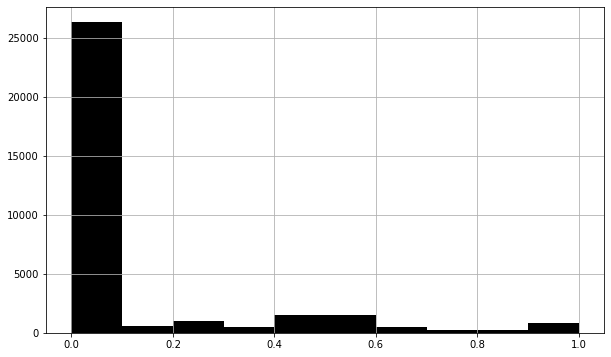

In [24]:
plt.figure(figsize = (10,6))
df['Subjectivity'].hist(color = 'black')

In [27]:
#Adding sentiment score 
sia = SentimentIntensityAnalyzer()

df['Compound'] = [sia.polarity_scores(v)['compound'] for v in df['headline_text']]
df['Negative'] = [sia.polarity_scores(v)['neg'] for v in df['headline_text']]
df['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df['headline_text']]
df['Positive'] = [sia.polarity_scores(v)['pos'] for v in df['headline_text']]
df.head()

,publish_date,headline_category,headline_text,Date,Subjectivity,Polarity,Mixed,Negative,Compound,Neutral,Positive
0,20010101,sports.wwe,win cena satisfi defeat undertak bigger roman ...,2001-01-01,0.45,0.4,0.2023,0.234,0.2023,0.469,0.297
1,20010102,unknown,statu quo disturb ayodhya say vajpaye,2001-01-02,0.00,0.0,-0.4019,0.351,-0.4019,0.649,0.000
2,20010102,unknown,fissur hurriyat pak visit,2001-01-02,0.00,0.0,0.0000,0.000,0.0000,1.000,0.000
3,20010102,unknown,america unwant head india,2001-01-02,0.00,0.0,0.0000,0.000,0.0000,1.000,0.000
4,20010102,unknown,bigwig destin goa,2001-01-02,0.00,0.0,0.0000,0.000,0.0000,1.000,0.000


In [32]:
df.drop(['publish_date','headline_category'],axis=1, inplace=True)


KeyError: "['publish_date' 'headline_category'] not found in axis"

In [33]:
df.head()

,headline_text,Date,Subjectivity,Polarity,Mixed,Negative,Compound,Neutral,Positive
0,win cena satisfi defeat undertak bigger roman ...,2001-01-01,0.45,0.4,0.2023,0.234,0.2023,0.469,0.297
1,statu quo disturb ayodhya say vajpaye,2001-01-02,0.00,0.0,-0.4019,0.351,-0.4019,0.649,0.000
2,fissur hurriyat pak visit,2001-01-02,0.00,0.0,0.0000,0.000,0.0000,1.000,0.000
3,america unwant head india,2001-01-02,0.00,0.0,0.0000,0.000,0.0000,1.000,0.000
4,bigwig destin goa,2001-01-02,0.00,0.0,0.0000,0.000,0.0000,1.000,0.000


# HYBRID 


In [54]:
# Importing here dataset from url
df_stock = pd.read_csv('Stock_data.csv')

In [58]:
df_concat = pd.concat([df_stock ,df],axis=1)
df_concat.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,headline_text,Date,Subjectivity,Polarity,Mixed,Negative,Compound,Neutral,Positive
0,2016-08-30,155.953995,156.001999,150.940002,154.104004,154.104004,1172655.0,win cena satisfi defeat undertak bigger roman ...,2001-01-01,0.45,0.4,0.2023,0.234,0.2023,0.469,0.297
1,2016-08-31,153.569000,155.759003,146.412994,155.369995,155.369995,909281.0,statu quo disturb ayodhya say vajpaye,2001-01-02,0.00,0.0,-0.4019,0.351,-0.4019,0.649,0.000


In [61]:
df_new = df_concat[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df_new[0:50]

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,154.104004,0.450000,0.40,0.2023,0.234,0.469,0.297
1,155.369995,0.000000,0.00,-0.4019,0.351,0.649,0.000
2,152.789993,0.000000,0.00,0.0000,0.000,1.000,0.000
3,153.082001,0.000000,0.00,0.0000,0.000,1.000,0.000
4,155.029007,0.000000,0.00,0.0000,0.000,1.000,0.000
5,154.688004,0.241667,0.05,0.3818,0.000,0.606,0.394
6,152.692001,0.000000,0.00,0.0000,0.000,1.000,0.000
7,154.445007,0.000000,0.00,0.0000,0.000,1.000,0.000
8,150.160995,0.000000,0.00,0.0000,0.000,1.000,0.000
9,150.160995,0.000000,0.00,0.5574,0.200,0.273,0.527


In [78]:
df_new.isnull().sum()


Close           0
Subjectivity    0
Polarity        0
Compound        0
Negative        0
Neutral         0
Positive        0
dtype: int64

In [77]:
df_new['Close'] = df_new['Close'].fillna(df_new['Close'].mean())

In [79]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df_scale = pd.DataFrame(sc.fit_transform(df_new))
df_scale.columns = df_new.columns
df_scale.index = df_new.index
df_scale.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.160051,0.45,0.7,0.621532,0.234,0.469,0.297
1,0.162296,0.00,0.5,0.288291,0.351,0.649,0.000
2,0.157721,0.00,0.5,0.509955,0.000,1.000,0.000
3,0.158239,0.00,0.5,0.509955,0.000,1.000,0.000
4,0.161692,0.00,0.5,0.509955,0.000,1.000,0.000


In [80]:
from sklearn.model_selection import train_test_split
X = df_scale.drop('Close', axis=1)

y =df_scale['Close']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
X_train.shape

(26564, 6)

In [82]:
X_train[:10]

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
8645,0.000000,0.500000,0.763003,0.000,0.571,0.429
27363,0.000000,0.500000,0.509955,0.000,1.000,0.000
24177,0.900000,0.900000,0.509955,0.000,1.000,0.000
18445,0.900000,0.850000,0.685456,0.000,0.566,0.434
28370,0.571429,0.678571,0.731620,0.000,0.526,0.474
31869,0.000000,0.500000,0.509955,0.000,1.000,0.000
14080,0.000000,0.500000,0.509955,0.000,1.000,0.000
12452,0.700000,0.683333,0.731620,0.000,0.426,0.574
20897,0.000000,0.500000,0.322431,0.444,0.556,0.000
16067,0.400000,0.700000,0.673212,0.000,0.577,0.423


In [99]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost 
import lightgbm 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [86]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
prediction=rf.predict(X_test)

In [87]:
print(prediction[:10])
print(y_test[:10])
print(mean_squared_error(prediction,y_test))

[0.50770385 0.58329196 0.5223219  0.52285849 0.52285849 0.52571432
 0.5223219  0.51640918 0.52285849 0.52889201]
2345     0.522858
624      0.674934
7562     0.522858
16489    0.522858
9764     0.522858
26913    0.522858
33097    0.522858
7256     0.522858
6648     0.522858
29684    0.522858
Name: Close, dtype: float64
0.002404847947905675


In [88]:
adb = AdaBoostRegressor()
adb.fit(X_train, y_train)
predictions = adb.predict(X_test)

In [89]:
print(mean_squared_error(predictions, y_test))

0.004820452892551047


In [90]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train, y_train)
predictions = dec_tree.predict(X_test)

In [91]:
print(predictions[:10])
print(y_test[:10])
print(mean_squared_error(predictions,y_test))

[0.50858343 0.59111285 0.52239769 0.52285849 0.52285849 0.52605776
 0.52239769 0.51679028 0.52285849 0.52908415]
2345     0.522858
624      0.674934
7562     0.522858
16489    0.522858
9764     0.522858
26913    0.522858
33097    0.522858
7256     0.522858
6648     0.522858
29684    0.522858
Name: Close, dtype: float64
0.002731488019448553


In [92]:
lgb = lightgbm.LGBMRegressor()
lgb.fit(X_train, y_train)

LGBMRegressor()

In [93]:
predictions = lgb.predict(X_test)
print(mean_squared_error(predictions,y_test))

0.002439818074436526


In [94]:
xgb = xgboost.XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [95]:
predictions = xgb.predict(X_test)
print(mean_squared_error(predictions,y_test))

0.0024527984748865103
